# Practicel ML - KNN

### Full Name : Mobina Salimipanah
### Student Number : 99109788

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [4]:
# TODO
df = pd.read_csv('train.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1,1585,...,1,80,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8


Calculate the number of samples

In [5]:
# TODO
num_samples = df.shape[0]
print(f"Number of samples: {num_samples}")

Number of samples: 1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [6]:
# TODO
unique_values = df.nunique()
print("Number of unique values for each column:\n", unique_values)

Number of unique values for each column:
 Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
T

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [7]:
# TODO
columns_to_drop = [col for col in df.columns if df[col].nunique() < 2]
df.drop(columns=columns_to_drop, inplace=True)
print(f"Columns dropped: {columns_to_drop}")

Columns dropped: ['EmployeeCount', 'Over18', 'StandardHours']


Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [15]:
# TODO
# handle uniqueness
df['BusinessTravel_mapped'] = df['BusinessTravel'].map({
    'Non-Travel': 0,         # Assumes no travel
    'Travel_Rarely': 1,      # Assumes infrequent travel
    'Travel_Frequently': 2   # Assumes frequent travel
})


Mapping 'BusinessTravel' to numerical values:
0    1
1    1
2    1
3    1
4    1
Name: BusinessTravel_mapped, dtype: int64


In [16]:
# Map the column

# TODO
print("Mapping 'BusinessTravel' to numerical values:")
print(df['BusinessTravel_mapped'].head())


Mapping 'BusinessTravel' to numerical values:
0    1
1    1
2    1
3    1
4    1
Name: BusinessTravel_mapped, dtype: int64


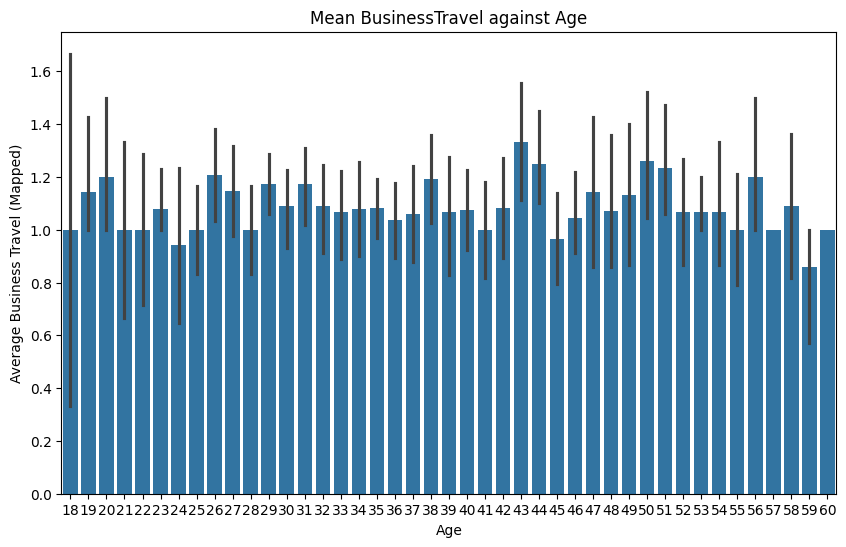

In [17]:
# plot

# TODO
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='BusinessTravel_mapped', data=df, estimator=np.mean)
plt.title('Mean BusinessTravel against Age')
plt.xlabel('Age')
plt.ylabel('Average Business Travel (Mapped)')
plt.show()


Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

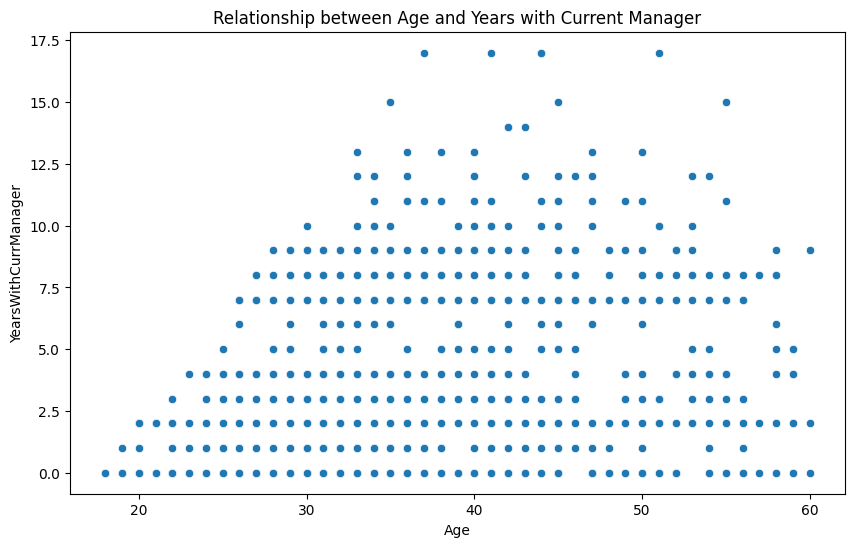

In [12]:
# TODO
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsWithCurrManager', data=df)
plt.title('Relationship between Age and Years with Current Manager')
plt.show()

Plot the average MonthlyIncome against the YearsAtCompany.

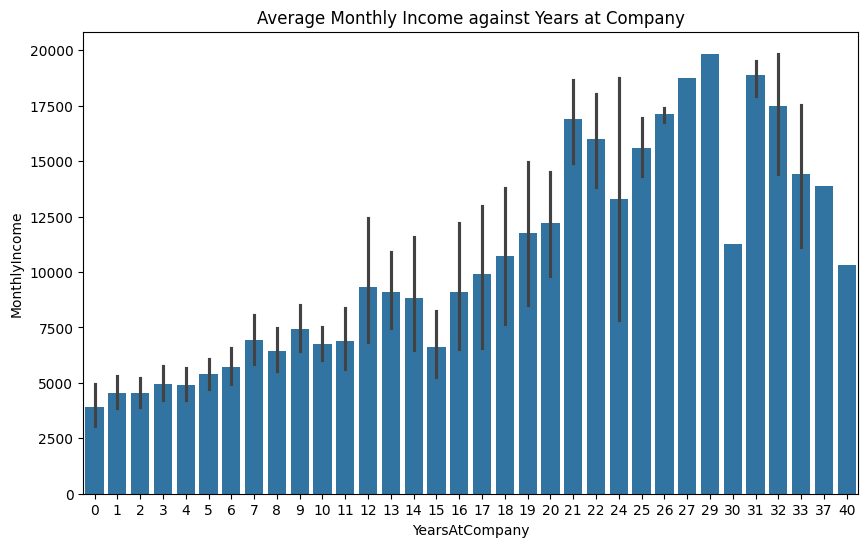

In [11]:
# TODO
# plot

plt.figure(figsize=(10, 6))
sns.barplot(x='YearsAtCompany', y='MonthlyIncome', data=df, estimator=np.mean)
plt.title('Average Monthly Income against Years at Company')
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [19]:
# Label encode

# TODO
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

In [23]:
# split into train and validation

# TODO
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [25]:
# lens of train and validation datasets

# TODO
print(f"Length of training dataset: {len(X_train)}")
print(f"Length of validation dataset: {len(X_val)}")

Length of training dataset: 660
Length of validation dataset: 221


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [22]:
# TODO
X_test_features = X_test  # Features for the test dataset
y_test_labels = y_test    # Labels for the test dataset

X_val_features = X_val
y_val_labels = y_val


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [40]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # TODO

        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        # TODO
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        # TODO
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO
        predicted_labels = [self._predict(x) for x in X_test]
        return np.array(predicted_labels)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Evaluation
  

Define the model and train it.

In [41]:
# TODO
knn = KNN(k=3)
knn.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = knn.predict(X_test.to_numpy())

In [42]:
# TODO
y_train_pred = knn.predict(X_train.to_numpy())
y_test_pred = knn.predict(X_test.to_numpy())

train_accuracy = np.mean(y_train_pred == y_train.to_numpy())
print(f"Train Accuracy: {train_accuracy}")

test_accuracy = np.mean(y_test_pred == y_test.to_numpy())
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8727272727272727
Test Accuracy: 0.755656108597285


Predict the y_train and y_test values.

# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [31]:
# TODO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_sklearn = KNeighborsClassifier(n_neighbors=3)

knn_sklearn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [32]:
# TODO
y_test_pred_sklearn = knn_sklearn.predict(X_test)

test_accuracy_sklearn = accuracy_score(y_test, y_test_pred_sklearn)
print(f"Test Accuracy: {test_accuracy_sklearn}")

Test Accuracy: 0.755656108597285


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**